In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei'] # 替换sans-serif字体
plt.rcParams['axes.unicode_minus '] = False   # 解决坐标轴负数的负号显示问题
plt.rc('figure', figsize=(10, 10))  # 设置plt图片的大小

In [3]:
from pymongo import MongoClient
conn = MongoClient(host='127.0.0.1',port=27017) # 实例化MongoClient
db = conn.get_database('Ticket')  # 连接到Ticket数据库
collection = db.get_collection('ticket') # 连接到ticket集合
datas = collection.find()  # 获取ticket集合中的所有数据

In [4]:
from pandas.io.json import json_normalize
# 把获取到的json数据标准化为DataFrame对象
data = json_normalize([data for data in datas])  

In [5]:
data.head()

,_id,city,cityName,comment,discountPrice,distance,features,featuresNew,fromName,h5_url,...,scm,shortInfo,sold365,soldRecent,soldRecentNum,subTitle,tagList,title,titleTagInfos,type
0,5ce6407de5de27f0a5a39cce,石家庄,None,None,81.2,None,"[{'key': '一句话描述', 'text': '千奇百怪的珊瑚，还能亲密触碰浅海动物，...",None,None,None,...,None,None,None,已售176笔,176,None,"[{'text': '5A景区', 'icon': None, 'borderColor':...",石家庄海洋公园,[],None
1,5ce6407de5de27f0a5a39ccf,石家庄,None,None,35.8,None,"[{'key': '一句话描述', 'text': '依据中国古典文学名著《红楼梦》严格设计...",None,None,None,...,None,None,None,已售335笔,335,None,"[{'text': 'AAA', 'icon': None, 'borderColor': ...",荣国府,[],None
2,5ce6407de5de27f0a5a39cd0,石家庄,None,None,152,None,"[{'key': '一句话描述', 'text': '水上过山车上尖叫声连连，还有模拟漂流、...",None,None,None,...,None,None,None,已售372笔,372,None,"[{'text': '4A景区', 'icon': None, 'borderColor':...",天山海世界,[],None
3,5ce6407de5de27f0a5a39cd1,石家庄,None,None,149,None,"[{'key': '一句话描述', 'text': '玻璃吊桥很刺激，空中漫步趟过峡谷的体验...",None,None,None,...,None,None,None,已售276笔,276,None,"[{'text': '5A景区', 'icon': None, 'borderColor':...",红崖谷,[],None
4,5ce6407de5de27f0a5a39cd2,石家庄,None,None,185,None,"[{'key': '一句话描述', 'text': '参观小动物的同时还能体验跳楼机等各种刺...",None,None,None,...,None,None,None,已售84笔,84,None,[],辛玛王国,[],None


In [6]:
# 查看字段信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56493 entries, 0 to 56492
Data columns (total 29 columns):
_id               56493 non-null object
city              56493 non-null object
cityName          0 non-null object
comment           51776 non-null object
discountPrice     56493 non-null object
distance          0 non-null object
features          56493 non-null object
featuresNew       51776 non-null object
fromName          0 non-null object
h5_url            51776 non-null object
itemId            56493 non-null object
itemTotalScore    51776 non-null float64
latitude          56493 non-null float64
longitude         56493 non-null float64
native_url        0 non-null object
p_score           56493 non-null object
pc_url            56493 non-null object
picUrl            56493 non-null object
price             56493 non-null object
scm               51776 non-null object
shortInfo         51776 non-null object
sold365           34151 non-null object
soldRecent        24996 

###  清洗数据
#### 1. 把需要的字段挑出来

In [7]:
data.columns

Index(['_id', 'city', 'cityName', 'comment', 'discountPrice', 'distance',
       'features', 'featuresNew', 'fromName', 'h5_url', 'itemId',
       'itemTotalScore', 'latitude', 'longitude', 'native_url', 'p_score',
       'pc_url', 'picUrl', 'price', 'scm', 'shortInfo', 'sold365',
       'soldRecent', 'soldRecentNum', 'subTitle', 'tagList', 'title',
       'titleTagInfos', 'type'],
      dtype='object')

In [8]:
# 查看第30行信息
data.iloc[30]

_id                                        5ce6407de5de27f0a5a39cec
city                                                            石家庄
cityName                                                       None
comment                                                          23
discountPrice                                                 117.1
distance                                                       None
features          [{'key': None, 'text': '平均1分钟出票', 'color': Non...
featuresNew       [{'key': None, 'text': '平均1分钟出票', 'color': Non...
fromName                                                       None
h5_url            https://h5.m.taobao.com/trip/travel-detail/ind...
itemId                                                 565173735686
itemTotalScore                                                    5
latitude                                                          0
longitude                                                         0
native_url                                      

In [9]:
data = data[['city','comment','discountPrice','features','featuresNew','itemId',
            'itemTotalScore','latitude','longitude','price','shortInfo','sold365',
            'soldRecentNum','tagList','title']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56493 entries, 0 to 56492
Data columns (total 15 columns):
city              56493 non-null object
comment           51776 non-null object
discountPrice     56493 non-null object
features          56493 non-null object
featuresNew       51776 non-null object
itemId            56493 non-null object
itemTotalScore    51776 non-null float64
latitude          56493 non-null float64
longitude         56493 non-null float64
price             56493 non-null object
shortInfo         51776 non-null object
sold365           34151 non-null object
soldRecentNum     56493 non-null object
tagList           56493 non-null object
title             56493 non-null object
dtypes: float64(3), object(12)
memory usage: 6.5+ MB


In [10]:
# 随机显示5条数据
data.sample(5)

,city,comment,discountPrice,features,featuresNew,itemId,itemTotalScore,latitude,longitude,price,shortInfo,sold365,soldRecentNum,tagList,title
23089,东营,0,199,"[{'key': None, 'text': '出票后立即可用', 'color': Non...","[{'key': None, 'text': '出票后立即可用', 'color': Non...",591256181838,0.0,0.0,0.0,199,东营,None,0,[],东营沐青汤泉 节假日通用门票+保健按摩/中式保健（免过夜费）
49275,吴忠,4,185,"[{'key': None, 'text': '16:00前可订今日票', 'color':...","[{'key': None, 'text': '16:00前可订今日票', 'color':...",547420904994,3.5,0.0,0.0,185,吴忠,已售40笔,11,[],【即买即入】宁夏青铜峡黄河大峡谷B线套票（108塔+大禹文化园）
21261,萍乡,72,60,"[{'key': None, 'text': '最早可定明日票', 'color': Non...","[{'key': None, 'text': '最早可定明日票', 'color': Non...",572646818706,5.0,0.0,0.0,60,萍乡,已售311笔,1,[],【自动出票】江西萍乡武功山门票/武功山门票露营成人电子票门票
4659,哈尔滨,0,125,"[{'key': None, 'text': '13:00前可订今日票', 'color':...","[{'key': None, 'text': '13:00前可订今日票', 'color':...",592888611570,0.0,0.0,0.0,125,哈尔滨,None,0,[],哈尔滨香炉山景区卧佛顶+空中森林+5D玻璃彩虹桥套票成人票电子票
52145,上海,52,258,"[{'key': None, 'text': '最早可定明日票', 'color': Non...","[{'key': None, 'text': '最早可定明日票', 'color': Non...",584027024024,4.8,0.0,0.0,258,上海,已售398笔,96,[],上海迪士尼乐园门票半日票夜场票迪斯尼夜游下午场票


#### 2. 去重

In [11]:
# drop_duplicates(subset= )   去除重复项，参数有
# subset : column label or sequence of labels, optional 
# 用来指定特定的列，默认所有列
# keep : {‘first’, ‘last’, False}, default ‘first’ 
# 删除重复项并保留第一次出现的项
# inplace : boolean, default False 
# 直接在原来数据上修改还是保留一个副本
data.drop_duplicates(subset='itemId', keep='first', inplace=True)

#### 3. 数据类型转换

In [12]:
# 由于np.nan是float，所以这里整体转换为float
data.loc[data['comment'].isnull(), 'comment'] = np.nan
data['comment'] = data['comment'].astype('float64')
data['discountPrice'] = data['discountPrice'].astype('float64')
data['itemId'] = data['itemId'].astype('int64')
data['price'] = data['price'].astype('float64')
data['soldRecentNum'] = data['soldRecentNum'].astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51344 entries, 0 to 56492
Data columns (total 15 columns):
city              51344 non-null object
comment           47262 non-null float64
discountPrice     51344 non-null float64
features          51344 non-null object
featuresNew       47262 non-null object
itemId            51344 non-null int64
itemTotalScore    47262 non-null float64
latitude          51344 non-null float64
longitude         51344 non-null float64
price             51344 non-null float64
shortInfo         47262 non-null object
sold365           30937 non-null object
soldRecentNum     51344 non-null float64
tagList           51344 non-null object
title             51344 non-null object
dtypes: float64(7), int64(1), object(7)
memory usage: 6.3+ MB


####  4. 各字段清洗
- features
- sold365
- tagList

In [13]:
data.sample(5)

,city,comment,discountPrice,features,featuresNew,itemId,itemTotalScore,latitude,longitude,price,shortInfo,sold365,soldRecentNum,tagList,title
11762,宁波,440.0,130.0,"[{'key': None, 'text': '17:30前可订今日票', 'color':...","[{'key': None, 'text': '17:30前可订今日票', 'color':...",38991645203,5.0,0.0,0.0,130.0,宁波,已售7648笔,205.0,[],【自动出票】宁波北仑凤凰山海港乐园门票/成人票/儿童票/亲子票
17724,厦门,0.0,178.0,"[{'key': None, 'text': '17:00前可订今日票', 'color':...","[{'key': None, 'text': '17:00前可订今日票', 'color':...",593083633847,0.0,0.0,0.0,178.0,厦门,None,0.0,[],即买即用】福建厦门观音山梦幻海岸水世界+车技馆联票 水世界门票
47406,西安,2.0,138.0,"[{'key': None, 'text': '最早可定明日票', 'color': Non...","[{'key': None, 'text': '最早可定明日票', 'color': Non...",568613967787,5.0,0.0,0.0,138.0,西安,已售24笔,0.0,[],陕西西安旅游景点门票西安碑林博物馆门票+大明宫遗址公园门票
24319,临沂,0.0,39.0,"[{'key': None, 'text': '最早可定明日票', 'color': Non...","[{'key': None, 'text': '最早可定明日票', 'color': Non...",587949462604,0.0,0.0,0.0,39.0,临沂,None,0.0,[],【永诚国旅】山东旅游 临沂景区 沂蒙红色影视基地 大门票 成人票
55588,香港,2.0,218.0,"[{'key': None, 'text': '17:00前可订今日票', 'color':...","[{'key': None, 'text': '17:00前可订今日票', 'color':...",581900411329,5.0,0.0,0.0,218.0,香港,已售5笔,0.0,[],香港天际100观景台|丽思卡尔顿酒店咖啡100美酒套票+观景台门票


In [14]:
def get_features_text(features):
    if len(features) > 0:
        return features[0]['text']
    else:
        return None

# features数据清洗
data['features'] = data['features'].map(get_features_text)
# tagList数据清洗
data['tagList'] = data['tagList'].map(get_features_text)

In [15]:
# sold365数据清洗
data['sold365'].sample(20)

54352       None
48509      已售16笔
3891        None
8641        None
6386     已售4290笔
24065       None
34089     已售182笔
22149      已售13笔
5221        已售8笔
286         None
16656       已售1笔
1435        None
36377      已售23笔
54603       已售2笔
10664       None
19473       已售6笔
22781       None
10655    已售2303笔
31191     已售586笔
19492       已售9笔
Name: sold365, dtype: object

In [16]:
def get_sold365(data):
    if data is None:
        return np.nan
    if "万" in data:
        return float(data[data.find('售')+1:data.find('万')]) * 10000
    else:
        return float(data[data.find('售')+1:data.find('笔')])

    
data['sold365'] = data['sold365'].apply(get_sold365)

In [17]:
data.sample(10)

,city,comment,discountPrice,features,featuresNew,itemId,itemTotalScore,latitude,longitude,price,shortInfo,sold365,soldRecentNum,tagList,title
33466,河源,8.0,138.0,17:00前可订今日票,"[{'key': None, 'text': '17:00前可订今日票', 'color':...",548032148370,5.0,0.0,0.0,138.0,河源,72.0,2.0,None,河源客天下水晶温泉 恐龙水世界+水晶温泉成人 儿童票套票
34064,东莞,2.0,39.9,20:00前可订今日票,"[{'key': None, 'text': '20:00前可订今日票', 'color':...",591962132853,4.7,0.0,0.0,39.9,东莞,10.0,10.0,None,东莞翻腾空间蹦床乐园大门票 随买随用
47243,西安,1.0,300.0,最早可定明日票,"[{'key': None, 'text': '最早可定明日票', 'color': Non...",535317995744,5.0,0.0,0.0,300.0,西安,22.0,0.0,None,（赠西安旅游地图）陕西历史博物馆大唐珍宝馆壁画珍品馆电子门票
18110,厦门,0.0,50.0,17:00前可订今日票,"[{'key': None, 'text': '17:00前可订今日票', 'color':...",586574632531,0.0,0.0,0.0,50.0,厦门,NaN,0.0,None,【自动发码电子票当日可订】福建厦门奥林匹克博物馆 大门票
18091,厦门,0.0,80.0,15:15前可订今日票,"[{'key': None, 'text': '15:15前可订今日票', 'color':...",585125468470,0.0,0.0,0.0,80.0,厦门,NaN,0.0,None,【自动发码当天可订】福建厦门诚毅科技探索中心大门票
39328,三亚,0.0,1780.0,最早可定明日票,"[{'key': None, 'text': '最早可定明日票', 'color': Non...",580917052465,0.0,0.0,0.0,1780.0,三亚,20.0,0.0,None,三亚蜈支洲岛豪华环岛潜含门船票管家式接待快速登岛专业潜水教学
37228,桂林,0.0,185.0,21:50前可订今日票,"[{'key': None, 'text': '21:50前可订今日票', 'color':...",594186299238,0.0,0.0,0.0,185.0,桂林,NaN,0.0,None,【黄金船期】夜游两江四湖豪华游船漓江船票日月双塔桂林旅游门票
6263,泰州,3.0,69.0,17:00前可订今日票,"[{'key': None, 'text': '17:00前可订今日票', 'color':...",593148255358,3.7,0.0,0.0,69.0,泰州,12.0,12.0,None,当天可订 江苏泰州 溱湖国家湿地公园门票 国家5A级景区
24862,泰安,1.0,75.0,17:00前可订今日票,"[{'key': None, 'text': '17:00前可订今日票', 'color':...",583117025362,5.0,0.0,0.0,75.0,北京,13.0,0.0,None,泰山皮影戏门票 中国皮影戏 北京前门大街
55758,澳门,46.0,57.0,17:00前可订今日票,"[{'key': None, 'text': '17:00前可订今日票', 'color':...",556832266435,4.9,0.0,0.0,57.0,澳门,547.0,12.0,None,澳门巴黎人酒店埃菲尔铁塔观光电子门票 7楼和37楼


#### 5. 把省份数据合并到表中

In [18]:
city_data = pd.read_csv('city_data.csv')
city_data.head()

,city,province
0,石家庄,河北省
1,邯郸,河北省
2,唐山,河北省
3,保定,河北省
4,秦皇岛,河北省


In [19]:
# on 用于连接的列名，必须同时存在于左右两个DataFrame对象中，
# 如果位置指定，则以left和right列名的交集作为连接键 
data_final = data.merge(city_data, on='city')
data_final.sample(5)

,city,comment,discountPrice,features,featuresNew,itemId,itemTotalScore,latitude,longitude,price,shortInfo,sold365,soldRecentNum,tagList,title,province
11290,宁波,0.0,75.0,16:00前可订今日票,"[{'key': None, 'text': '16:00前可订今日票', 'color':...",43399172767,0.0,0.0000,0.000,75.0,宁波,88.0,0.0,None,浙江宁波海天一洲观光塔门票+观光平台联 杭州湾跨海大桥电子票,浙江省
50542,澳门,NaN,170.0,途经景点：澳门观光塔、澳门南湾湖畔、澳门友谊大桥、澳门永利酒店、澳门新文华东方酒店妈阁庙、海...,None,257,NaN,22.1958,113.531,170.0,None,NaN,557.0,景点,粤通船票,澳门
40252,南充,0.0,43.0,16:00前可订今日票,"[{'key': None, 'text': '16:00前可订今日票', 'color':...",589411943938,0.0,0.0000,0.000,43.0,南充,7.0,2.0,None,四川南充阆中熊猫乐园门票 七项游乐项目票,四川省
34103,桂林,3.0,232.0,出票1小时后可用,"[{'key': None, 'text': '出票1小时后可用', 'color': No...",569767760920,5.0,0.0000,0.000,232.0,桂林,53.0,0.0,None,夜游两江四湖豪华船+象鼻山大门票【桂林旅游景点套票】,广西壮族自治区
29560,清远,0.0,64.0,15:00前可订今日票,"[{'key': None, 'text': '15:00前可订今日票', 'color':...",592719351603,0.0,0.0000,0.000,64.0,清远,NaN,0.0,None,广东清远英德洞天仙境门票（含玻璃栈道+单程游船）成人票,广东省


In [20]:
data_final.to_csv('data_final.csv', index=False)

In [21]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51344 entries, 0 to 51343
Data columns (total 16 columns):
city              51344 non-null object
comment           47262 non-null float64
discountPrice     51344 non-null float64
features          51082 non-null object
featuresNew       47262 non-null object
itemId            51344 non-null int64
itemTotalScore    47262 non-null float64
latitude          51344 non-null float64
longitude         51344 non-null float64
price             51344 non-null float64
shortInfo         47262 non-null object
sold365           30937 non-null float64
soldRecentNum     51344 non-null float64
tagList           3304 non-null object
title             51344 non-null object
province          51344 non-null object
dtypes: float64(8), int64(1), object(7)
memory usage: 6.7+ MB


### 问题
1. 哪些城市/省份的旅游选择最多？
2. 哪些城市最受游客青睐？
3. 最热门的景点
4. 各省份的好评热门景点
5. 很热门但是评分不好的景点
6. 打折力度最大的景点
7. 各级别景区的门票价格

#### 1. 哪些城市/省份的旅游选择最多？

In [22]:
count_top12 = data_final['shortInfo'].value_counts()[:12]
count_top12

三亚    2884
杭州    1941
北京    1662
上海    1642
桂林    1623
广州    1451
厦门    1186
香港     989
清远     957
成都     897
苏州     880
武汉     797
Name: shortInfo, dtype: int64

In [23]:
# 漏斗图
from pyecharts import Funnel

funnel = Funnel("旅游选择最多的前12个城市", width = 800,height=600)
funnel.add("", count_top12.index
           , count_top12.values, legend_top=30,
           xaxis_label_textsize=20, yaxis_label_textsize=14, is_label_show=True,
          )
funnel

In [24]:
count_province = data_final['province'].value_counts()
count_province

广东省         5422
浙江省         5122
江苏省         4029
海南省         3852
福建省         2980
山东省         2942
广西壮族自治区     2532
湖北省         2406
安徽省         1869
北京市         1745
云南省         1583
河北省         1563
辽宁省         1525
上海市         1510
四川省         1503
江西省         1306
河南省         1254
陕西省         1196
香港          1003
重庆市          864
湖南省          773
澳门           692
黑龙江省         651
甘肃省          496
天津市          488
山西省          389
贵州省          380
宁夏回族自治区      295
吉林省          291
内蒙古自治区       201
西藏自治区        182
台湾           138
新疆维吾尔自治区     119
青海省           43
Name: province, dtype: int64

In [25]:
province = [ province.replace('省','') for province in list(count_province.index)]
province = [ pro.replace('市','') for pro in province ]
province

['广东',
 '浙江',
 '江苏',
 '海南',
 '福建',
 '山东',
 '广西壮族自治区',
 '湖北',
 '安徽',
 '北京',
 '云南',
 '河北',
 '辽宁',
 '上海',
 '四川',
 '江西',
 '河南',
 '陕西',
 '香港',
 '重庆',
 '湖南',
 '澳门',
 '黑龙江',
 '甘肃',
 '天津',
 '山西',
 '贵州',
 '宁夏回族自治区',
 '吉林',
 '内蒙古自治区',
 '西藏自治区',
 '台湾',
 '新疆维吾尔自治区',
 '青海']

In [26]:
from pyecharts import Map


map = Map("全国各省份旅游选择数量图", width=800, height=800)
map.add(
    "",
    province,
    count_province.values,
    maptype="china",
    is_visualmap=True,
    visual_text_color="#000",
    visual_range=[0, 5000]
)
map

#### 2. 哪些城市最受游客青睐？

In [27]:
# nlargest()的优点就是能一次看到最大的几行，而且不需要排序。
# 缺点就是只能看到最大的，看不到最小的。
data_group = data_final.groupby('shortInfo')
city_sold_top10 = data_group['soldRecentNum'].sum().nlargest(10)
# city_sold_top10 = data_group['soldRecentNum'].sum().sort_values(ascending = False)[:10]

In [28]:
city_sold_top10

shortInfo
上海    141930.0
北京     83053.0
香港     72197.0
广州     66612.0
苏州     50515.0
杭州     49078.0
南京     39831.0
武汉     38051.0
西安     35582.0
成都     31926.0
Name: soldRecentNum, dtype: float64

In [29]:
from pyecharts import Bar

bar = Bar("最近一个月售出门票Top10城市", width = 700,height=500)
bar.add("", city_sold_top10.index, city_sold_top10.values, is_stack=True, 
       xaxis_label_textsize=18, yaxis_label_textsize=14, is_label_show=True,
       xaxis_rotate=25)
bar

In [30]:
# itemTotalScore 景点评分，comment 景点评论数量
city_favor_count = data_final[(data_final['itemTotalScore'] > 0)&
                              (data_final['comment'] > 30)
                             ].groupby('shortInfo')['itemTotalScore'].count()
city_favor_count

shortInfo
万宁市       8
三亚      205
三明       10
上海      341
上饶       22
东莞       31
中卫       13
中山       10
临汾        1
临沂       22
丽水        8
丽江       46
乐山       10
九江        4
云浮        5
五指山市      5
佛山       39
保定        8
保山        5
信阳        3
儋州市       2
六安        9
兰州        1
兴安        2
凉山        1
北京      243
北海       13
十堰        5
南京      113
南充        2
       ... 
遵义        2
邯郸        2
郑州       41
郴州        7
鄂尔多斯      2
酒泉       18
重庆       64
金华       53
铜仁        1
银川       13
镇江       20
长春       13
长沙       24
阜阳        2
阳江       10
阳泉        1
阿勒泰       6
随州        6
雅安        4
青岛       94
鞍山        3
韶关        4
香港      262
马鞍山       3
鹰潭        4
黄冈       24
黄山       55
黔东南       1
齐齐哈尔      2
龙岩        7
Name: itemTotalScore, Length: 224, dtype: int64

In [31]:
city_qual = list(city_favor_count[city_favor_count > 30].index)
city_qual

['三亚',
 '上海',
 '东莞',
 '丽江',
 '佛山',
 '北京',
 '南京',
 '南平',
 '厦门',
 '哈尔滨',
 '大理',
 '大连',
 '天津',
 '宁波',
 '宜昌',
 '常州',
 '广州',
 '张家界',
 '成都',
 '扬州',
 '无锡',
 '昆明',
 '杭州',
 '桂林',
 '武汉',
 '泰安',
 '济南',
 '海口',
 '深圳',
 '清远',
 '湖州',
 '澳门',
 '烟台',
 '珠海',
 '福州',
 '秦皇岛',
 '绍兴',
 '芜湖',
 '苏州',
 '西安',
 '郑州',
 '重庆',
 '金华',
 '青岛',
 '香港',
 '黄山']

In [32]:
#取出满足条件城市景点的平均评分
city_favor_top10 = data_final[(data_final['itemTotalScore']>0)&
                            (data_final['comment']>30)&
                            (data_final['shortInfo'].isin(city_qual))
                            ].groupby('shortInfo')['itemTotalScore'].mean().nlargest(20)

In [33]:
city_favor_top10

shortInfo
宜昌     4.956757
济南     4.950000
扬州     4.947368
澳门     4.942105
武汉     4.940559
海口     4.940476
大连     4.937500
北京     4.933745
南京     4.932743
常州     4.928333
杭州     4.928125
无锡     4.927957
香港     4.927481
哈尔滨    4.923684
秦皇岛    4.920000
福州     4.920000
苏州     4.917347
成都     4.917164
黄山     4.916364
珠海     4.915957
Name: itemTotalScore, dtype: float64

In [34]:
# 词云图
from pyecharts import WordCloud


name, value = city_favor_top10.index, city_favor_top10.values*10-30
wordcloud = WordCloud(width=500, height=500)
wordcloud.add("", name, value, word_size_range=[20, 80])
wordcloud

#### 3. 最热门的景点

##### sort_values()的用法
- DataFrame.sort_values(by=‘##’,axis=0,ascending=True, inplace=False, na_position=‘last’)
- by，指定排序的字段
- axis	若axis=0或’index’，则按照指定列中数据大小排序；若axis=1或’columns’，则按照指定索引中数据大小排序，默认axis=0
- ascending	是否按指定列的数组升序排列，默认为True，即升序排列
- inplace	是否用排序后的数据集替换原来的数据，默认为False，即不替换
- na_position	{‘first’,‘last’}，设定缺失值的显示位置

In [35]:
ticket_sold_top10 = data_final.sort_values(by='soldRecentNum',
                    ascending = False)[:10][['title','soldRecentNum']]
ticket_sold_top10

,title,soldRecentNum
47156,上海迪士尼度假区,201886.0
8649,灵隐飞来峰,127266.0
49530,香港迪士尼乐园,78633.0
27303,广州长隆野生动物世界,43358.0
44923,故宫博物院,42409.0
31214,珠海长隆海洋王国,37203.0
47159,上海野生动物园,31625.0
38749,东方明珠广播电视塔,30882.0
44924,北京世界园艺博览会,30588.0
27304,广州长隆水上乐园,30111.0


In [36]:
title_top10 = ticket_sold_top10['title'].values.tolist()
title_top10

['上海迪士尼度假区',
 '灵隐飞来峰',
 '香港迪士尼乐园',
 '广州长隆野生动物世界',
 '故宫博物院',
 '珠海长隆海洋王国',
 '上海野生动物园',
 '东方明珠广播电视塔',
 '北京世界园艺博览会',
 '广州长隆水上乐园']

In [37]:
sold_top10 = ticket_sold_top10['soldRecentNum'].values.tolist()
sold_top10

[201886.0,
 127266.0,
 78633.0,
 43358.0,
 42409.0,
 37203.0,
 31625.0,
 30882.0,
 30588.0,
 30111.0]

In [38]:
bar = Bar("最热门的10个景点", width = 800,height=800)
bar.add("", title_top10, sold_top10, is_stack=True, 
       xaxis_label_textsize=14, yaxis_label_textsize=14, is_label_show=True,
       xaxis_rotate=20)
bar

#### 4. 各省份的好评热门景点

In [39]:
data_final.sample(4)

,city,comment,discountPrice,features,featuresNew,itemId,itemTotalScore,latitude,longitude,price,shortInfo,sold365,soldRecentNum,tagList,title,province
37812,三亚,0.0,45.0,20:00前可订今日票,"[{'key': None, 'text': '20:00前可订今日票', 'color':...",592387648201,0.0,0.0,0.0,45.0,三亚,NaN,0.0,None,海南 三亚 鹿回头风景区 门票+电瓶车 三亚旅游,海南省
30928,惠州,32.0,77.0,21:00前可订今日票,"[{'key': None, 'text': '21:00前可订今日票', 'color':...",549903128274,4.8,0.0,0.0,77.0,惠州,444.0,0.0,None,M【急速出票】温泉票 惠州【龙门铁泉温泉门票+冷暖水世界】门票,广东省
26907,张家界,45.0,159.0,20:00前可订今日票,"[{'key': None, 'text': '20:00前可订今日票', 'color':...",576970784975,4.9,0.0,0.0,159.0,张家界,232.0,0.0,None,【双人238】湖南张家界万福温泉门票 慈利万福温泉电子门票成人票,湖南省
51182,澳门,2.0,105.0,最早可定明日票,"[{'key': None, 'text': '最早可定明日票', 'color': Non...",575193749893,5.0,0.0,0.0,105.0,澳门,13.0,0.0,None,澳门开蓬观光巴士票 澳门景点门票开蓬巴士旅游观光车票 11处地标,澳门


In [40]:
def get_top1(data):
    return data.head(1)

In [41]:
data_final_sort = data_final.sort_values(by=['province','itemTotalScore',
                'soldRecentNum'],ascending=False).groupby('province')
province_top1 = data_final_sort.apply(get_top1)[['title',
                                'soldRecentNum','itemTotalScore']].reset_index()
province_top1

,province,level_1,title,soldRecentNum,itemTotalScore
0,上海市,47229,上海迪士尼乐门票 上海迪士尼乐园门票1日票 迪斯尼门票,11126.0,5.0
1,云南省,41005,l 【电子票】云南昆明七彩云南欢乐世界门票 古滇欢乐世界,618.0,5.0
2,内蒙古自治区,1957,内蒙古 呼和浩特 大召寺 大门票 呼和浩特旅游 大召寺门票,72.0,5.0
3,北京市,44997,故宫门票 北京故宫电子票 含珍宝馆钟表馆 故宫博物院门票 当日票,7743.0,5.0
4,台湾,44793,台北“故宫博物院“ 门票 二维码扫码入园电子票,305.0,5.0
5,吉林省,3688,长春5A级景区【净月潭国家森林公园】官方电子门票 直接入园,150.0,5.0
6,四川省,39152,成都熊猫基地门票 大熊猫繁育研地究基地大门票,6553.0,5.0
7,天津市,46686,【官方门票】天津方特欢乐世界门票 刷身份证入园,1055.0,5.0
8,宁夏回族自治区,44498,l【电子票】 宁夏银川镇北堡西部影视城大门票 华夏西部影城,421.0,5.0
9,安徽省,15323,九华山天台索道上下联票天台索道票 即拍即用刷二维码乘坐,2395.0,5.0


In [42]:
province_top1.drop(columns='level_1',inplace=True)

In [43]:
province_top1.rename(columns={'province':'省份',
                             'title':'景区项目名',
                             'soldRecentNum':'销量',
                             'itemTotalScore':'评分'},inplace=True)
province_top1.sort_values(by='销量',ascending=False)
province_top1

,省份,景区项目名,销量,评分
0,上海市,上海迪士尼乐门票 上海迪士尼乐园门票1日票 迪斯尼门票,11126.0,5.0
1,云南省,l 【电子票】云南昆明七彩云南欢乐世界门票 古滇欢乐世界,618.0,5.0
2,内蒙古自治区,内蒙古 呼和浩特 大召寺 大门票 呼和浩特旅游 大召寺门票,72.0,5.0
3,北京市,故宫门票 北京故宫电子票 含珍宝馆钟表馆 故宫博物院门票 当日票,7743.0,5.0
4,台湾,台北“故宫博物院“ 门票 二维码扫码入园电子票,305.0,5.0
5,吉林省,长春5A级景区【净月潭国家森林公园】官方电子门票 直接入园,150.0,5.0
6,四川省,成都熊猫基地门票 大熊猫繁育研地究基地大门票,6553.0,5.0
7,天津市,【官方门票】天津方特欢乐世界门票 刷身份证入园,1055.0,5.0
8,宁夏回族自治区,l【电子票】 宁夏银川镇北堡西部影视城大门票 华夏西部影城,421.0,5.0
9,安徽省,九华山天台索道上下联票天台索道票 即拍即用刷二维码乘坐,2395.0,5.0


#### 5. 很热门但是评分不好的景点

In [44]:
data_final[(data_final['soldRecentNum']>100)&
           (data_final['itemTotalScore']<4.5)&
           (data_final['itemTotalScore']>0)][['shortInfo','title',
                                              'soldRecentNum','itemTotalScore']]

,shortInfo,title,soldRecentNum,itemTotalScore
8529,苏州,【当天可订 快速出票】江苏 苏州 华谊兄弟电影世界 大门票,106.0,4.0
10735,宁波,宁波奉化滕头生态景区门票 滕头村门票 藤头村 电子票 团队咨询,189.0,4.4
18121,漳州,福建漳州云水谣古镇大门票（今日可用） 成人儿童学生老人门票,158.0,4.3
22810,泰安,泰安太阳部落门票|太阳部落直通车|门票+往返车费|当天可订,113.0,4.4
24036,驻马店,河南 驻马店 金顶山景区 大门票,102.0,4.4
25040,襄阳,夜场88元起 随时定 湖北襄阳中国唐城影视基地门票 襄阳唐城门票,188.0,4.3
25046,襄阳,【当天可订】扫码入园湖北襄阳中国唐城门票中国唐城景区电子票,1986.0,4.3
25530,咸宁,【快速取票】咸宁九宫山门票 /九宫山套票石龙峡索道票当天可预订,176.0,4.3
32976,桂林,【可选接送】桂林阳朔游漓江杨堤九马画山至兴坪竹筏漂流门票船票,152.0,4.2
39198,成都,当日可订 四川旅游 成都 漫花庄园门票+玻璃桥套票 漫花庄园景区,101.0,3.8


#### 6. 打折力度最大的景点

In [45]:
data_final['discount'] = np.round((1-(data_final['price']-
                    data_final['discountPrice'])/data_final['price'])*10,1)

In [46]:
data_final.sample(10)

,city,comment,discountPrice,features,featuresNew,itemId,itemTotalScore,latitude,longitude,price,shortInfo,sold365,soldRecentNum,tagList,title,province,discount
45048,北京,2.0,178.0,13:10前可订今日票,"[{'key': None, 'text': '13:10前可订今日票', 'color':...",585379251273,5.0,0.0000,0.000,178.0,北京,41.0,36.0,None,北京 八达岭长城 门票+索道/地面缆车(往返) Q,北京市,10.0
42111,保山,1.0,50.0,17:00前可订今日票,"[{'key': None, 'text': '17:00前可订今日票', 'color':...",564885642941,5.0,0.0000,0.000,50.0,保山,9.0,1.0,None,【当天可订】云南腾冲门票景点大门票 腾冲热海景区成人票 电子票,云南省,10.0
9752,杭州,0.0,120.0,14:25前可订今日票,"[{'key': None, 'text': '14:25前可订今日票', 'color':...",586126646234,0.0,0.0000,0.000,120.0,杭州,5.0,0.0,None,| 当天可订 杭州西溪湿地东区门票 西溪湿地东区/含4次船票,浙江省,10.0
28189,广州,14.0,65.0,最早可定明日票,"[{'key': None, 'text': '最早可定明日票', 'color': Non...",559358314083,4.8,0.0000,0.000,65.0,广州,96.0,0.0,None,广东广州南湖游乐园门票白云区南湖游乐园电子票多项免费机动游戏,广东省,10.0
26673,长沙,0.0,160.0,22:00前可订今日票,"[{'key': None, 'text': '22:00前可订今日票', 'color':...",590460895955,0.0,0.0000,0.000,160.0,长沙,NaN,0.0,None,灰汤华天城温泉成人票,湖南省,10.0
43687,汉中,0.0,68.0,16:25前可订今日票,"[{'key': None, 'text': '16:25前可订今日票', 'color':...",539206844724,0.0,0.0000,0.000,68.0,汉中,45.0,0.0,None,陕西汉中华阳古镇景区 汉中华阳古镇门票 电子票,陕西省,10.0
34202,桂林,0.0,12.0,出票1小时后可用,"[{'key': None, 'text': '出票1小时后可用', 'color': No...",547137621755,0.0,0.0000,0.000,12.0,桂林,1.0,0.0,None,桂林 阳朔 大榕树景区,广西壮族自治区,10.0
14164,铜陵,NaN,43.0,None,None,37902978,NaN,30.9459,118.149,43.0,None,NaN,51.0,None,铜陵梧桐花谷,安徽省,10.0
16810,厦门,0.0,399.0,最早可定明日票,"[{'key': None, 'text': '最早可定明日票', 'color': Non...",594823123018,0.0,0.0000,0.000,399.0,厦门,2.0,2.0,None,【方特季卡】厦门方特水上乐园季卡 8月31日前有效无限次入园,福建省,10.0
42040,保山,3.0,237.0,23:59前可订今日票,"[{'key': None, 'text': '23:59前可订今日票', 'color':...",38729862553,5.0,0.0000,0.000,237.0,保山,385.0,0.0,None,【第二件5折】云南省腾冲旅游景点门票悦椿温泉村成人票优惠热卖,云南省,10.0


In [50]:
discount_data = data_final.sort_values(by='discount')[['shortInfo','title',                                                       
                                       'price','discountPrice','discount']]

In [51]:
discount_data

,shortInfo,title,price,discountPrice,discount
41118,昆明,【可定当天】云南华侨城温泉水公园 禄丰恐龙谷等11景无限次入园,1580.00,188.00,1.2
12863,金华,提前1个小时武义千丈岩景区大门票+景交车+丛林穿越26/27号19.9抢,88.00,19.66,2.2
40722,遵义,贵州遵义红石野谷自然风景区,25.00,6.10,2.4
36035,三亚,当天可订，三亚夜游三亚湾扬帆之星号夜游三亚湾门票,99.00,25.00,2.5
31748,中山,ZM【当天可定 即定即用】 广东中山詹园 成人儿童老人亲子大门票,100.00,27.00,2.7
31133,东莞,ZM【当天可定】广东 东莞南社明清古村落 成人儿童老人观光大门票,50.00,13.50,2.7
31521,珠海,ZM【当天可定 即定即用】广东 珠海农科奇观 成人儿童观光大门票,50.00,14.00,2.8
31262,珠海,【598元/10次卡】超值钜惠 珠海海泉湾海洋温泉10次卡 可4人使用,1980.00,598.00,3.0
35289,海口,随订随取！海口市观澜湖狂野水世界大门票景区通票水上乐园景点,160.00,48.00,3.0
28832,深圳,【即买即用含夜场】深圳世界之窗（大门票） 世界之窗日场门票,210.00,62.00,3.0


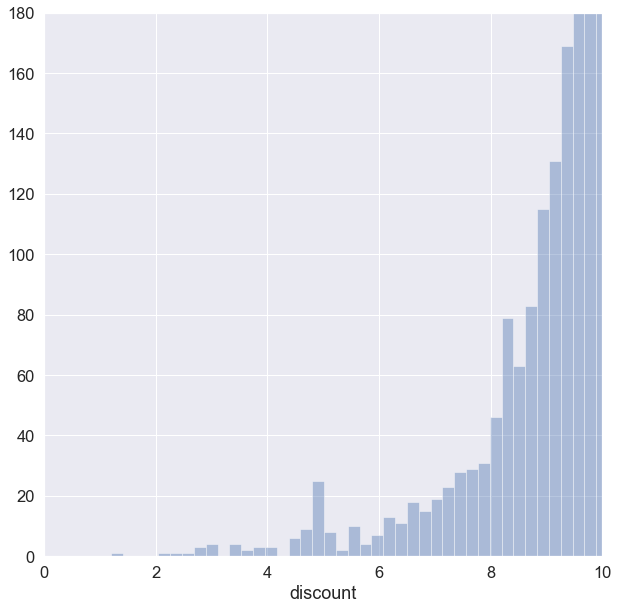

In [53]:
# 折扣分布图
sns.set(font_scale=1.5)
g = sns.distplot(discount_data['discount'],kde=False)
g.set_xlim(0,10)
g.set_ylim(0,180)
plt.show()

In [54]:
# 把七折以下的景点信息存入到csv文件中
discount_data[discount_data['discount']<7].to_csv('discount.csv',index=False)

In [56]:
# 七折以下的景点数量排名前5的城市
discount_data[discount_data['discount']<7].groupby('shortInfo')['title'].count().nlargest(5)

shortInfo
桂林    19
三亚    16
香港    10
上海     9
成都     7
Name: title, dtype: int64

#### 7. 各级别景区的门票价格

In [60]:
# 以tagList分组各类的景点的均价
data_final.groupby('tagList')['price'].mean()

tagList
4A景区      79.778529
5A景区     123.096160
A         62.477778
AA        77.104000
AAA      107.366524
今日可用     144.470649
可订今日票     87.730233
山         95.000000
明日可用     145.440000
景点       141.494737
演出       250.000000
赛事       365.000000
Name: price, dtype: float64

In [61]:
level = ['A','AA','AAA','4A景区','5A景区',]
level_data = data_final.groupby('tagList')['price'].mean()[level]

In [62]:
level_data

tagList
A        62.477778
AA       77.104000
AAA     107.366524
4A景区     79.778529
5A景区    123.096160
Name: price, dtype: float64

In [64]:
bar = Bar("各级别景区的门票价格", width = 600,height=500)
bar.add("", level_data.index, np.round(level_data.values,0), is_stack=True, 
       xaxis_label_textsize=18, yaxis_label_textsize=14, is_label_show=True)
bar